In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Importandado e lendo o csv

In [58]:
file_path = 'Cancer_diagnostic.csv'
data = pd.read_csv(file_path)

# Verficando o tamanho do dataset

In [61]:
print(f"Tamanho do dataset: {data.shape}")

Tamanho do dataset: (569, 33)


# Verificando as colunas e tipos de dados

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Mostrando o resumo estatístico do dataset

In [63]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Verificando a distribuição das classes e criando gráfico de pizza

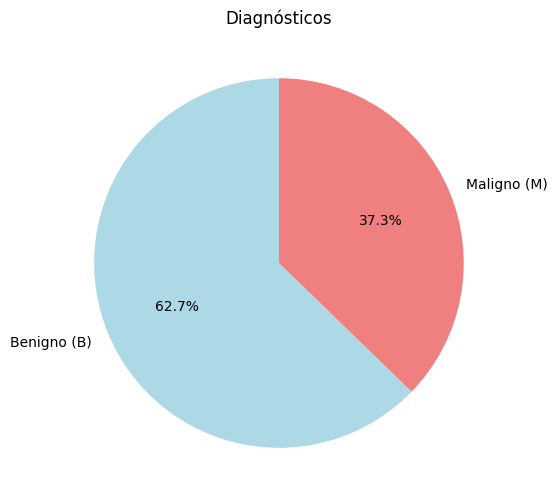

diagnosis
B    357
M    212
Name: count, dtype: int64


In [71]:
diagnosis_distribution = data['diagnosis'].value_counts()
diagnosis_distribution.plot(kind='pie', autopct='%1.1f%%', labels=['Benigno (B)', 'Maligno (M)'], colors=['lightblue', 'lightcoral'], figsize=(6,6), startangle=90)
plt.title('Diagnósticos')
plt.ylabel('')
plt.show()

print(diagnosis_distribution)

# Criando gráfico de boxplot para as variáveis numéricas

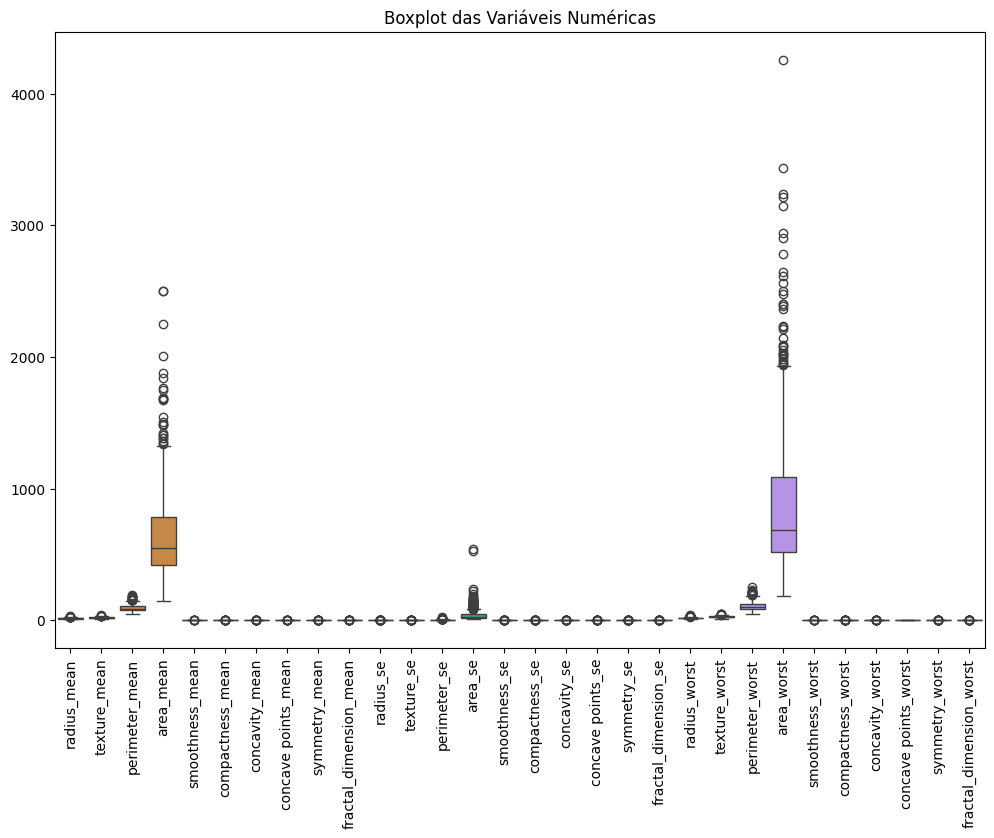

In [72]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data.drop(columns=['id', 'diagnosis', 'Unnamed: 32']))
plt.xticks(rotation=90)
plt.title('Boxplot das Variáveis Numéricas')
plt.show()

# Verificando se existem valores ausentes no dataset

In [73]:
missing_values = data.isnull().sum()
print("Valores ausentes:")
print(missing_values[missing_values > 0])

Valores ausentes:
Unnamed: 32    569
dtype: int64


# Removendo a coluna 'Unnamed: 32' e padronizando os dados numéricos

In [74]:
data_cleaned = data.drop(columns=['Unnamed: 32', 'id'])

# Separando os dados em X (features) e y (alvo)
X = data_cleaned.drop(columns=['diagnosis'])
y = data_cleaned['diagnosis']

# Convertendo o rótulo de diagnóstico para valores binários (M = 1, B = 0)
y = y.map({'M': 1, 'B': 0})

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exibindo as primeiras linhas dos dados padronizados
pd.DataFrame(X_scaled, columns=X.columns).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Removendo os outliers e mostre o boxplot do dataset usando IQR (Intervalo Interquartil)

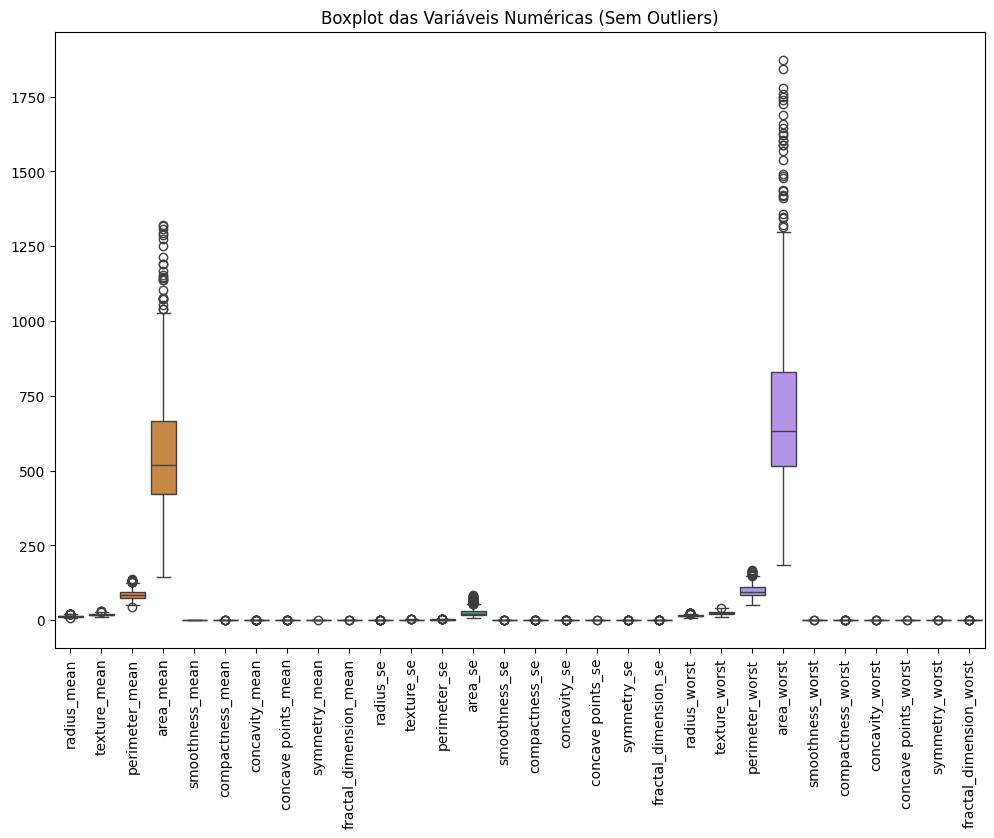

In [80]:
# Calculando os quartis e o IQR
Q1 = data.drop(columns=['id', 'diagnosis', 'Unnamed: 32']).quantile(0.25)
Q3 = data.drop(columns=['id', 'diagnosis', 'Unnamed: 32']).quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removendo os outliers
data_no_outliers = data.drop(columns=['id', 'diagnosis', 'Unnamed: 32']).mask(
    (data.drop(columns=['id', 'diagnosis', 'Unnamed: 32']) < lower_bound) |
    (data.drop(columns=['id', 'diagnosis', 'Unnamed: 32']) > upper_bound)
).dropna()

# Exibindo o novo boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=data_no_outliers)
plt.xticks(rotation=90)
plt.title('Boxplot das Variáveis Numéricas (Sem Outliers)')
plt.show()


# Dividindo o dataset em conjunto de treino (80%) e teste (20%)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Classificando com KNN

In [76]:
# Função para treinar e avaliar o modelo KNN com diferentes valores de K
def evaluate_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f"K={k}: Accuracy={accuracy:.4f}, Recall={recall:.4f}, Precision={precision:.4f}")

# Avaliando o modelo KNN com K=3, K=5, e K=7
for k in [3, 5, 7]:
    evaluate_knn(k)

K=3: Accuracy=0.9474, Recall=0.9302, Precision=0.9302
K=5: Accuracy=0.9474, Recall=0.9302, Precision=0.9302
K=7: Accuracy=0.9474, Recall=0.9302, Precision=0.9302
